# Laboratorium 13

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [3]:
import numpy as np
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()
y = np.array(y)

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [4]:
import numpy as np
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()
y = np.array(y)

# print(X)
# print(y)
y = np.where(y < 4, -1, 1)

min_X = np.min(X, axis=0)
max_X = np.max(X, axis=0)

X = (X - min_X) / (max_X - min_X)
print(X)

[[0.06994635 0.44444444 0.         ... 0.22222222 0.         0.        ]
 [0.07016441 0.44444444 0.33333333 ... 0.22222222 0.11111111 0.        ]
 [0.07109638 0.22222222 0.         ... 0.22222222 0.         0.        ]
 ...
 [0.06164188 0.44444444 1.         ... 0.77777778 1.         0.11111111]
 [0.06228791 0.33333333 0.77777778 ... 1.         0.55555556 0.        ]
 [0.06228791 0.33333333 0.77777778 ... 1.         0.33333333 0.        ]]


### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

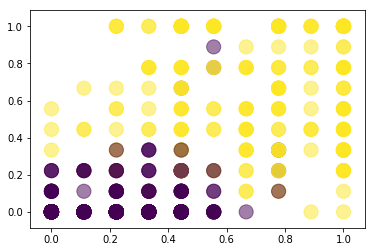

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

x1 = X[:, 1]
x2 = X[:, 2]

plt.scatter(x1,x2, s=200, alpha=0.5, c=y)


###### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [99]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta)

[-6.99534089 -0.18099245  0.98590886  0.42019705  0.10457698 -0.59830206
  0.85739125 -0.31840576  0.47729336  0.16637872]


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

(683,)


(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  1.,
         3.,  4.,  6.,  1.,  1.,  8.,  4.,  6.,  4., 14.,  9., 11.,  4.,
         8.,  9.,  8., 14., 12., 16., 12.,  8.,  8., 12.,  9.,  5.,  1.,
         5.,  6.,  5.,  5.,  1.,  4.,  3.,  1.,  1.,  2.,  0.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ]),
 <a list of 50 Patch objects>)

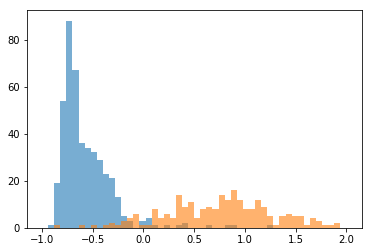

In [160]:
# print(y)
indices_lt0 = np.argwhere(y < 0).flatten()
# print(indices_lt0)
indices_gt0 = np.argwhere(y > 0).flatten()
bx = X @ beta
print(bx.shape)
width = .15
# plt.hist(bx)
plt.hist(bx[indices_lt0], range=(-1,2), alpha=0.6, bins=50)
plt.hist(bx[indices_gt0], range=(-1,2), alpha=0.6, bins=50)

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [174]:
# print(bx)
labels = np.where(bx < 0, -1, 1)
print(labels)

[-1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1
  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1
  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1
  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1 -1 -1
  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [172]:
ev = y - labels
print(1 - np.count_nonzero(ev) / len(y))

0.9487554904831625


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [181]:
C = 1.8
beta = np.linalg.inv(X.T @ X + 1/C * np.identity(X.shape[1])) @ X.T @ y
bx = X @ beta
threshold = 0
labels = np.where(bx < 0, -1, 1)
ev = y - labels
print(1 - np.count_nonzero(ev) / len(y))

0.9502196193265007


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']